# Cifar 10 cnn

Dit bestand is gemaakt door Guy veenhof (1765567)

## General

### Load data

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

### Sample data

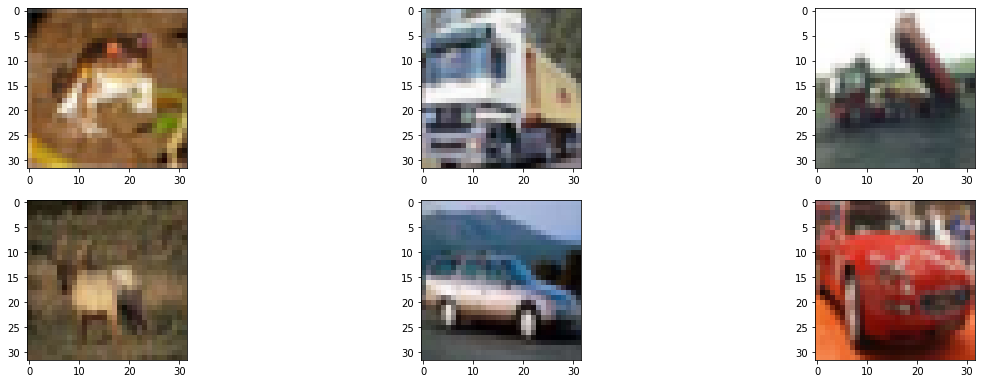

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

### Imports

In [3]:
# Dit zorgt ervoor dat ik geen errors krijg voor het runnen van code op mijn gpu
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras import utils
import keras

import numpy as np

### Data preparation

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
print(f"Train shape: {train_X.shape}")
print(f"Test shape: {test_X.shape}")

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [6]:
train_Y=utils.to_categorical(train_Y)
test_Y=utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [7]:
print(f"Train shape: {train_Y.shape}")
print(f"\nTest shape: {test_Y.shape}")

Train shape: (50000, 10)

Test shape: (10000, 10)


In [8]:
def loss_acc_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()    
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## CNN 1 	[data-flair](https://data-flair.training/blogs/image-classification-deep-learning-project-python-keras/)

### Create model

Dit model komt van data flair af. Ik was benieuwd hoe een model van een bron eruit zou zien en hoe goed het zou doen. Zodat ik later kan kijken of ik het beter heb kunnen maken.

In [9]:
model=Sequential() # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Convolution Layer 2
model.add(Conv2D(32,(3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Fully Connected Layer 3
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))

# Fully Connected Layer 4
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
# sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
history = model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.6835 - accuracy: 0.3828 - val_loss: 1.1513 - val_accuracy: 0.6007
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1427 - accuracy: 0.5888 - val_loss: 1.0189 - val_accuracy: 0.6460
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0169 - accuracy: 0.6414 - val_loss: 0.9817 - val_accuracy: 0.6553
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9337 - accuracy: 0.6706 - val_loss: 0.9547 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8868 - accuracy: 0.6876 - val_loss: 0.9165 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8515 - accuracy: 0.6993 - val_loss: 0.8851 - val_accuracy: 0.6919
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8004 - accuracy: 0.7196 - val_loss: 0.8992 - val_a

De accuracy is redelijk alleen de loss is zeer hoog. Dus dit model moet nog iets beter ontwikkeld worden.
Hieronder ga ik mijn eigen model maken.

## My model

In [13]:
model1 = Sequential()

# Conv Layer 1
# Ik wil veel kleine patronen kunnen vinden zodat je beter onderscheid kan maken.
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32,32,3),padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# Conv Layer 2
# Omdat door de maxpool al is gegeneraliseerd worden de filters ook minder maar ga je wel kijken naar grotere patronen
# De reden dat ik hier dropout heb gedaan is om overfitting tegen te gaan.
model1.add(Conv2D(64, (5,5), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# Conv layer 3
# Hier geldt dezelfde argumentatie als bij Conv Layer 2
model1.add(Conv2D(32, (7,7), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))
model1.add(Flatten())

# Fully connected layer 4
# Nodes zijn gelijk aan het aantal outputs van conv layer 3
model1.add(Dense(512, activation='relu'))

# Fully connected layer 5
# output nodes zijn gelijk aan het aantal mogelijke classificaties
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [15]:
history = model1.fit(train_X, train_Y,
                validation_split=0.2,
                batch_size=64,
                epochs=50,
                verbose=1)

Epoch 1/50
625/625 [==============================] - 9s 13ms/step - loss: 0.2997 - accuracy: 0.2681 - val_loss: 0.2162 - val_accuracy: 0.5054
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 0.2066 - accuracy: 0.5278 - val_loss: 0.1820 - val_accuracy: 0.6000
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 0.1793 - accuracy: 0.6009 - val_loss: 0.1590 - val_accuracy: 0.6528
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.1589 - accuracy: 0.6538 - val_loss: 0.1470 - val_accuracy: 0.6900
Epoch 5/50
625/625 [==============================] - 8s 12ms/step - loss: 0.1437 - accuracy: 0.6890 - val_loss: 0.1443 - val_accuracy: 0.6969
Epoch 6/50
625/625 [==============================] - 8s 12ms/step - loss: 0.1345 - accuracy: 0.7156 - val_loss: 0.1308 - val_accuracy: 0.7280
Epoch 7/50
625/625 [==============================] - 8s 13ms/step - loss: 0.1258 - accuracy: 0.7328 - val_loss: 0.1309 - val_accuracy: 0.7228

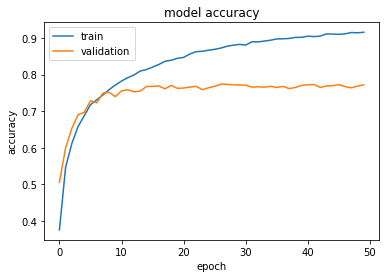

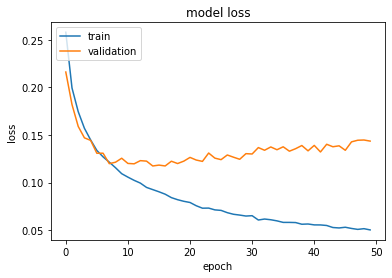

In [16]:
loss_acc_plot(history)

## Data augmentation

We gebruiken model1 om nog data augmentation op uit te voeren. De reden waarom we nog data augmentation uitvoeren. Is omdat wij ons netwerk zo robuust/constant mogelijk willen maken.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True)
train_generator = datagen.flow(train_X, train_Y, batch_size=64)

In [18]:
aug_model1 = Sequential()

# Conv Layer 1
aug_model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32,32,3),padding='same'))
aug_model1.add(Activation('relu'))
aug_model1.add(MaxPooling2D(pool_size=(2,2)))
aug_model1.add(Dropout(0.2))

# Conv Layer 2
aug_model1.add(Conv2D(64, (5,5), padding='same'))
aug_model1.add(Activation('relu'))
aug_model1.add(MaxPooling2D(pool_size=(2,2)))
aug_model1.add(Dropout(0.2))

# Conv layer 3
aug_model1.add(Conv2D(32, (7,7), padding='same'))
aug_model1.add(Activation('relu'))
aug_model1.add(MaxPooling2D(pool_size=(2,2)))
aug_model1.add(Dropout(0.2))
aug_model1.add(Flatten())

# Fully connected layer 4
aug_model1.add(Dense(32, activation='relu'))

# Fully connected layer 5
aug_model1.add(Dense(10, activation='softmax'))
aug_model1.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')

In [19]:
steps = int(50000 / 64) # trainingsset is 50000 lang.
aug_history = aug_model1.fit(train_generator, steps_per_epoch=steps, epochs=50, validation_data=(test_X, test_Y), verbose=1)

Epoch 1/50
781/781 [==============================] - 20s 25ms/step - loss: 0.3123 - accuracy: 0.2387 - val_loss: 0.2315 - val_accuracy: 0.4613
Epoch 2/50
781/781 [==============================] - 19s 25ms/step - loss: 0.2358 - accuracy: 0.4469 - val_loss: 0.1960 - val_accuracy: 0.5564
Epoch 3/50
781/781 [==============================] - 19s 24ms/step - loss: 0.2135 - accuracy: 0.5148 - val_loss: 0.1839 - val_accuracy: 0.5958
Epoch 4/50
781/781 [==============================] - 19s 24ms/step - loss: 0.1977 - accuracy: 0.5560 - val_loss: 0.1626 - val_accuracy: 0.6508
Epoch 5/50
781/781 [==============================] - 19s 24ms/step - loss: 0.1870 - accuracy: 0.5851 - val_loss: 0.1619 - val_accuracy: 0.6436
Epoch 6/50
781/781 [==============================] - 19s 25ms/step - loss: 0.1787 - accuracy: 0.6075 - val_loss: 0.1560 - val_accuracy: 0.6674
Epoch 7/50
781/781 [==============================] - 19s 24ms/step - loss: 0.1721 - accuracy: 0.6216 - val_loss: 0.1578 - val_accuracy:

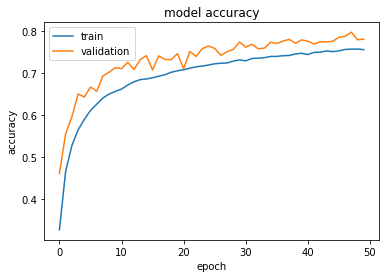

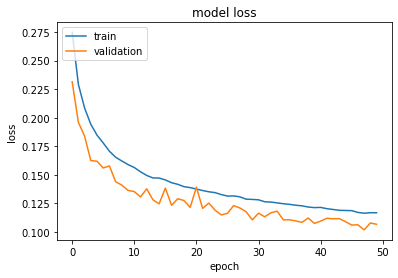

In [20]:
loss_acc_plot(aug_history)

Het is een aardig goed model dat getraind is met behulp van nog wat data augmentation! Het is zoiezo beter dan die van data flair. Ik weet niet wat het beste model is voor de cifar-10 dataset.

In [21]:
loss, accuracy = aug_model1.evaluate(test_X, test_Y)
print(f"loss: {loss}")
print(f"accuracy: {accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1068 - accuracy: 0.7814
loss: 0.10682133585214615
accuracy: 0.7814000248908997


Het model is niet overfitted, omdat het model het zelfs beter doet op de test zet dan op de train set. Dit betekent dat het model dat is getraind robuust is en aardige voorspellingen kan geven.